In [22]:
import pandas as pd
import matplotlib.pyplot as plt
# from NewsSentiment import TargetSentimentClassifier
from scipy.signal import savgol_filter


In [23]:
# tsc = TargetSentimentClassifier()
# tsc.infer_from_text("i hate trump", "trump")

In [24]:
cnn = pd.read_csv('../data/output_data/cnn_trump_normalized_nltk_sentences_sentiment.csv') # change this to bibi
fox = pd.read_csv('../data/output_data/fox_trump_normalized_nltk_sentences_sentiment.csv')


In [25]:
worst_precentile = cnn.compound_s.quantile(0.1)
best_precentile = cnn.compound_s.quantile(0.9)
print("worst_precentile (10%): ", worst_precentile, ". best_precentile (10%): ", best_precentile)

best_precentile = cnn.compound_s.quantile(0.95)
print("best_precentile (5%): ", best_precentile)

cnn[cnn.compound_s < worst_precentile].loc[:, ('title', 'compound_s')].values

worst_precentile (10%):  -0.3818 . best_precentile (10%):  0.4248716666666666
best_precentile (5%):  0.5744772222222211


array([["Michigan threats deepen America's dangerous nexus between antisemitism and political violence",
        -0.4403272727272727],
       ["Fact check: Zelensky didn't say American sons and daughters have to fight in Ukraine",
        -0.4536],
       ['The fastest growing metro in the US is looking to a shrinking reservoir to keep the boom going',
        -0.44435],
       ["Fox faces an 'existential threat' from its multibillion-dollar defamation cases",
        -0.4040999999999999],
       ["Blinken's new warning to Beijing is the latest sign of deteriorating US-China relations",
        -0.4393],
       ['Top Republicans question McCarthy over release of January 6 footage as speaker vows deliberate approach',
        -0.8573],
       ['Rupert Murdoch acknowledged that Fox News hosts endorsed false stolen election claims',
        -0.4464222222222221],
       ['5 things to know for Feb. 23: Storms, Toxic train, Shooting, Spy balloon, ChatGPT',
        -0.765],
       ["Exclusive

In [26]:
cnn.year = cnn.date.apply(lambda x: x.split('-')[0])

/tmp/ipykernel_7058/4201374739.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cnn.year = cnn.date.apply(lambda x: x.split('-')[0])


In [27]:
cnn.year.value_counts()

2022    1754
2023     644
2021       2
Name: date, dtype: int64

In [28]:
cnn[cnn.compound_s > best_precentile].loc[:, ('title', 'compound_s')].values

array([["The best moments from Tapper's one-on-one with Bill Maher",
        0.5946],
       ['Near bomb-grade level uranium found in Iranian nuclear plant, says IAEA report',
        0.6369],
       ["Biden administration tells student loan forgiveness applicants it is 'confident' in face of Supreme Court skepticism",
        0.6124],
       ["Top US Defense official says Iran could produce 'one bomb's worth of fissile material' in 'about 12 days'",
        0.6808],
       ['CNN town hall on toxic train disaster in East Palestine, Ohio',
        0.7269],
       ['Transportation Secretary Pete Buttigieg to visit Ohio town affected by toxic train derailment on Thursday',
        0.6335],
       ["Buttigieg says he'll visit East Palestine 'when the time is right,' lays out new rail safety efforts",
        0.7096],
       ['Vivek Ramaswamy announces GOP bid for president in 2024',
        0.7096],
       ['February 17, 2023 - Russia-Ukraine news', 0.6486],
       ['Democratic Rep. Barbar

In [29]:
def add_label(row):
    labels = {row['neg_s']: 'Negative', row['pos_s']:'Positive', row['neu_s']:'Neutral'}
    max_val = max(labels.keys())
    row['label'] = labels[max_val]
    row[labels[max_val]] = 1
    labels.pop(max_val)
    for key in labels.keys():
        row[labels[key]] = 0
    return row

cnn = cnn.apply(add_label, axis=1)
fox = fox.apply(add_label, axis=1)

    
    

In [30]:
def date_from_2021(df):
    df.date = [pd.to_datetime(date).strftime("%Y-%m-%d") for date in df.date]
    df = df[(df['date'] > '2021-01-01') & (df['date'] < '2022-01-01')]
    df = df.sort_values(by='date')
    return df

cnn = date_from_2021(cnn)
fox = date_from_2021(fox)

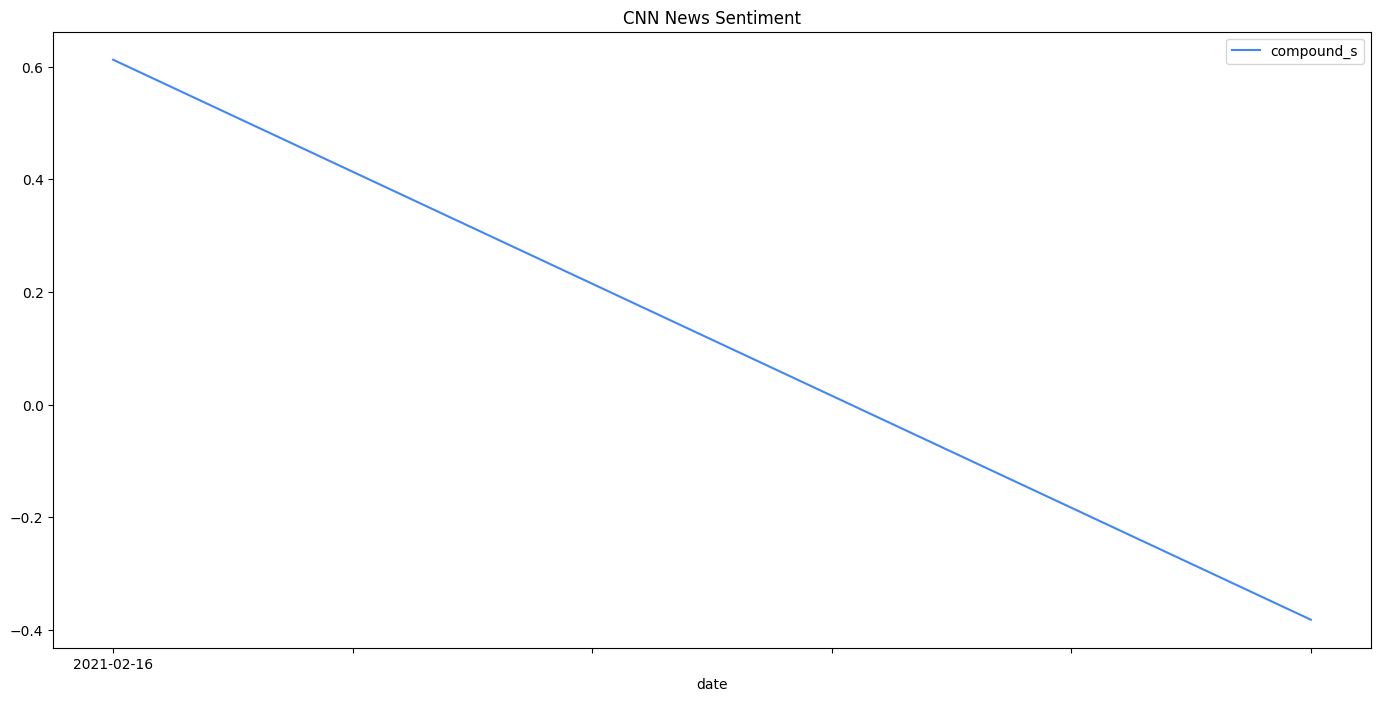

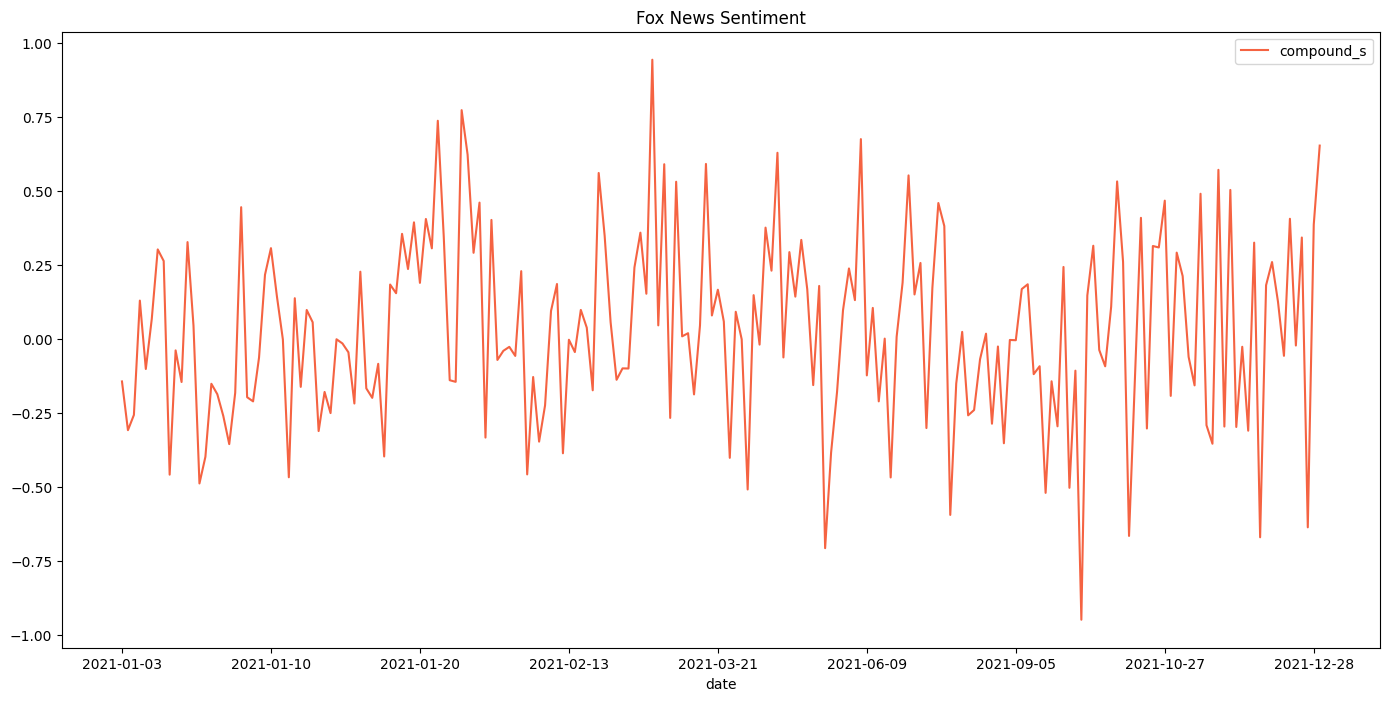

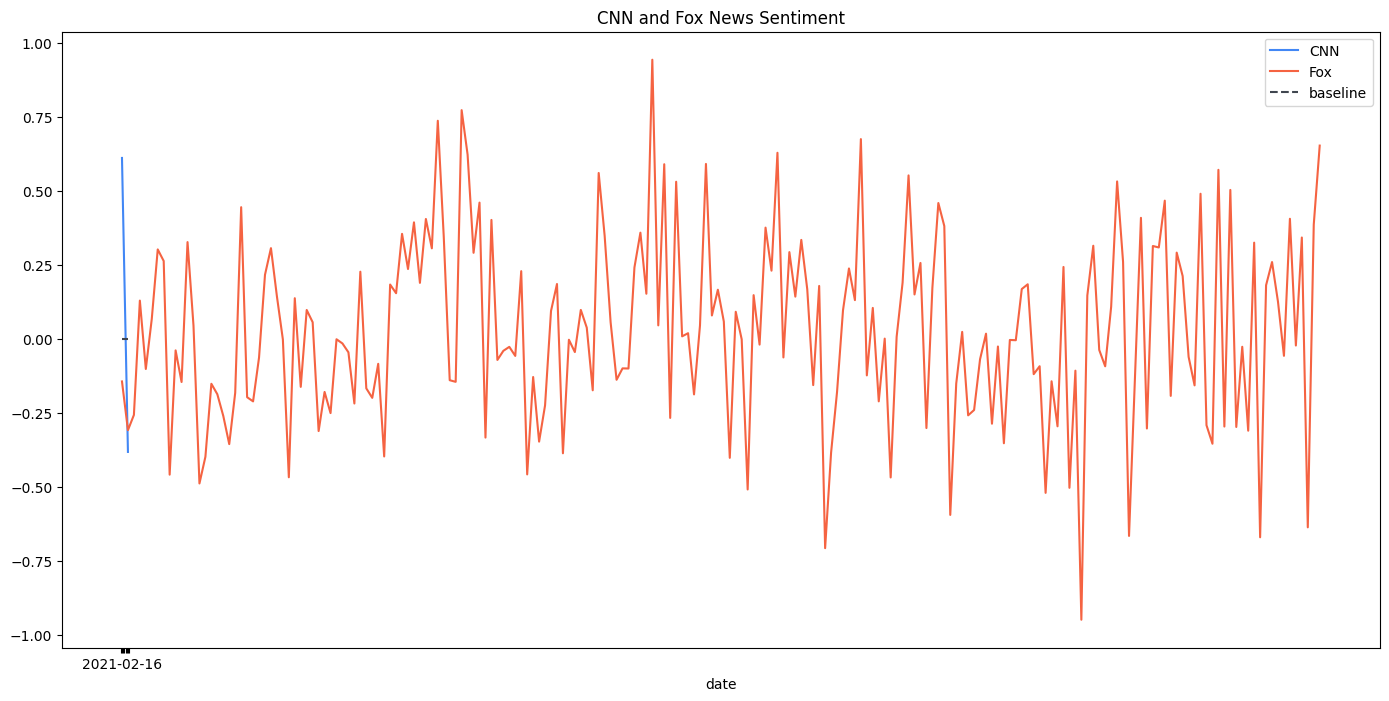

In [33]:
def plot(df:pd.DataFrame, vendor, color='#4287f5'):
    df = df.sort_values(by=['date'])
    axes = df.plot(x='date', y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8), color=color)


def joined_plot(df1:pd.DataFrame, df2:pd.DataFrame, vendor1, vendor2, color1='#4287f5', color2='#f56342'):    
    df1 = df1.sort_values(by=['date']).rename(columns={'compound_s': vendor1})
    df2 = df2.sort_values(by=['date']).rename(columns={'compound_s': vendor2})
    
    axes = df1.plot(x='date', y=vendor1, kind='line', title=f'{vendor1} and {vendor2} News Sentiment', color=color1 , figsize=(17,8))
    df2.plot(x='date', y=vendor2, kind='line', ax=axes, color=color2)
    df3 = pd.DataFrame({'date': df1.date, 'baseline': [0.0]*len(df1)}).plot(x='date', y='baseline', kind='line', ax=axes, color='#40464f', linestyle='--')

plot(cnn, 'CNN')
plot(fox, 'Fox', color='#f56342')
joined_plot(cnn, fox, 'CNN', 'Fox')

/tmp/ipykernel_7058/608157500.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = ((df['date'].dt.year.astype(int) - 2000) * 1000)  + df['date'].dt.week.astype(int)
/tmp/ipykernel_7058/608157500.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('week').median().plot(y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))
/tmp/ipykernel_7058/608157500.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = ((df['date'].dt.year.astype(int) - 2000) * 1000)  + df['date'].dt.week.astype(int)
/tmp/ipykernel_7058/608157500.py:5: FutureWarning: The default value of numeric_only in Dat

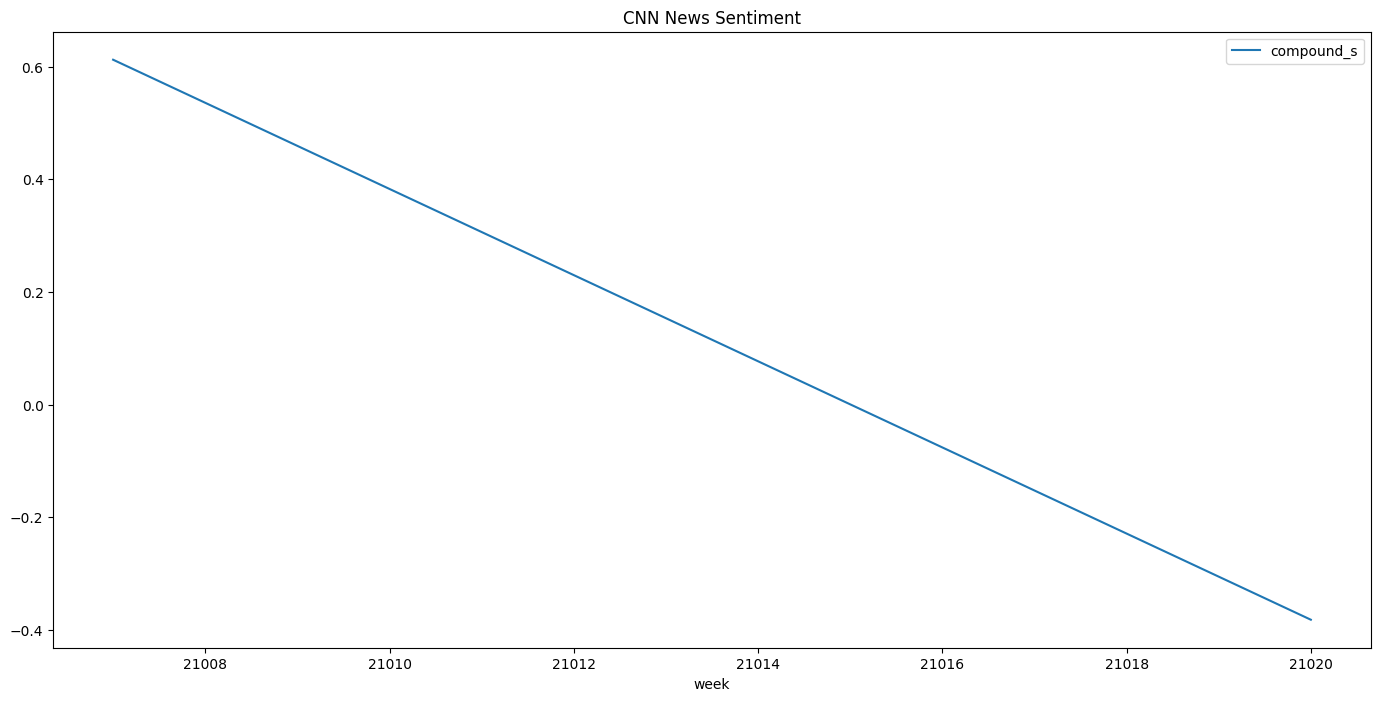

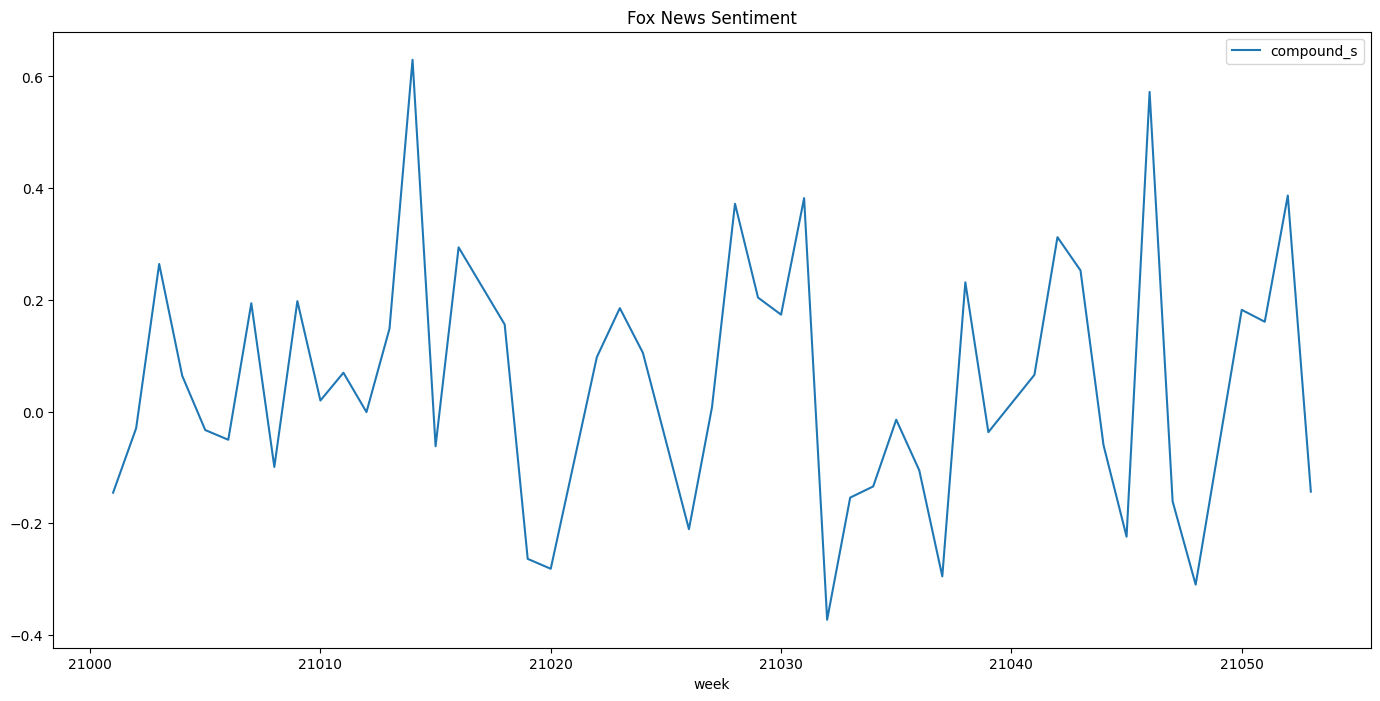

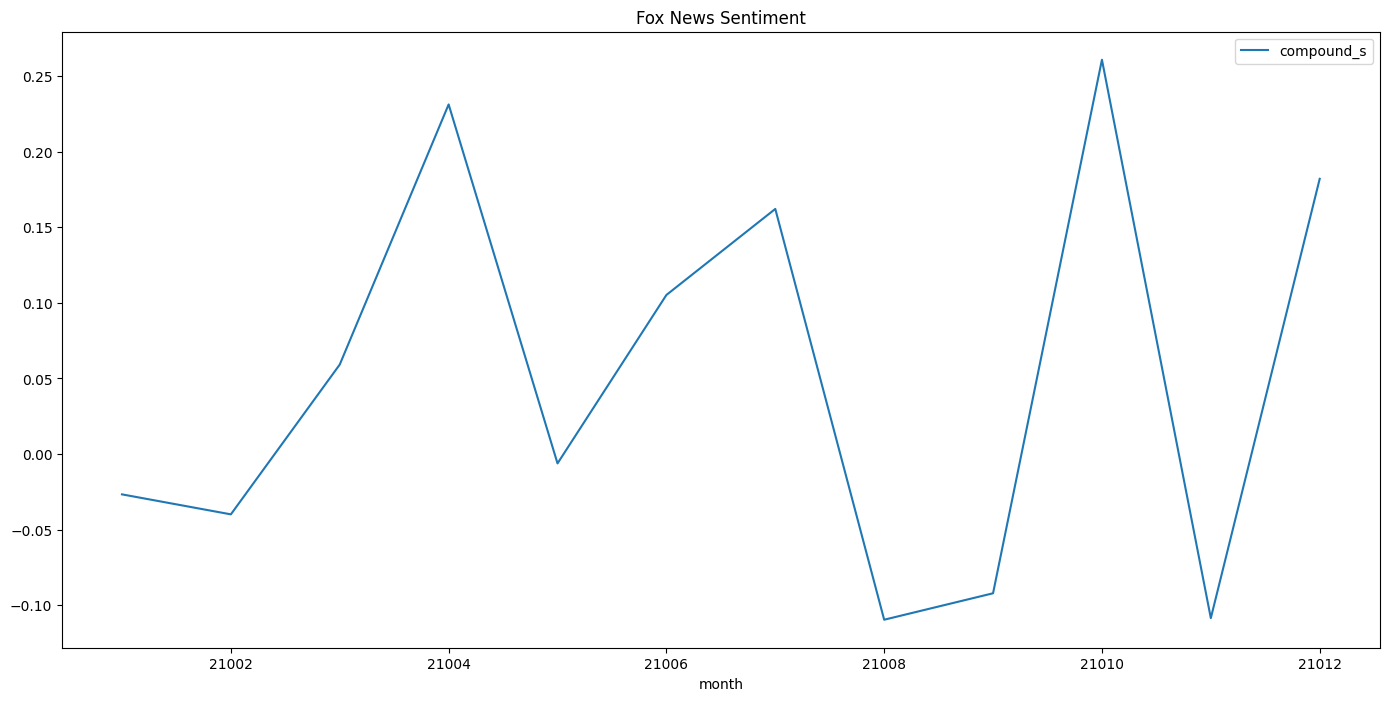

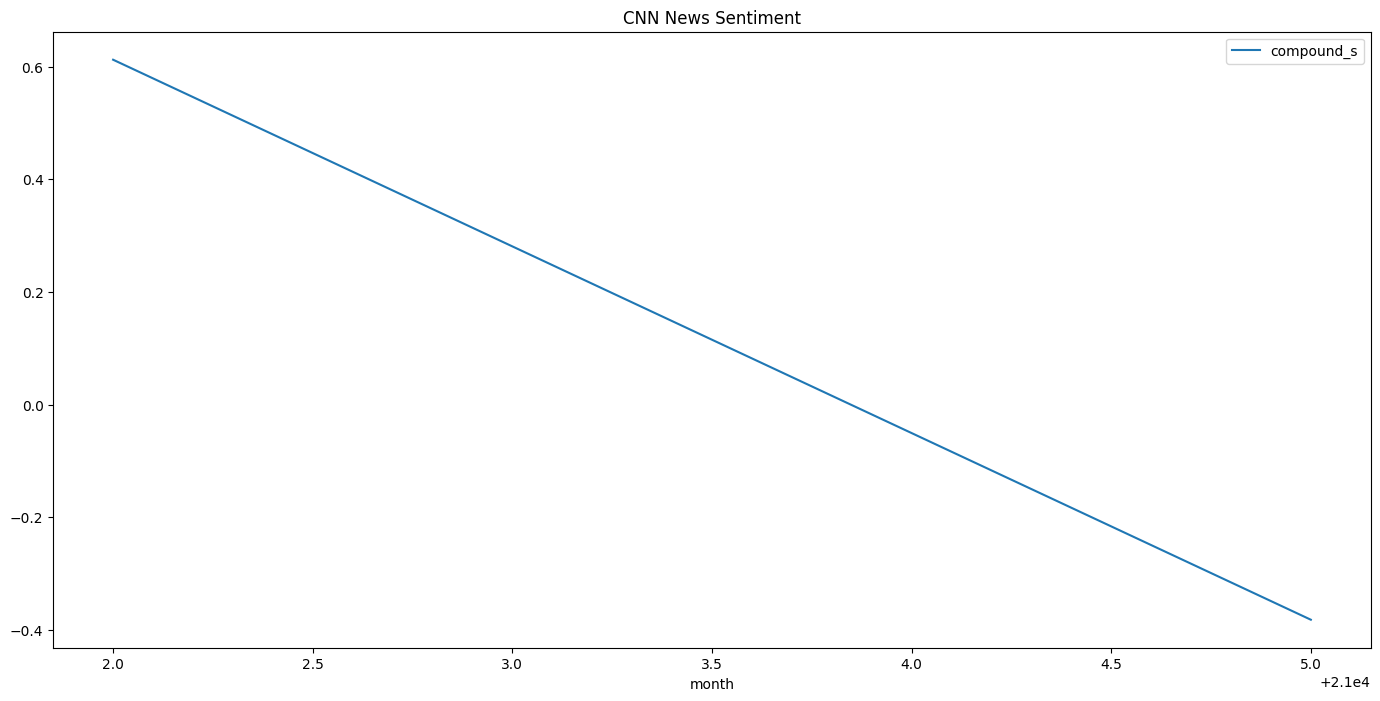

In [40]:
def weekly_avg_plot(df:pd.DataFrame, vendor):
    
    df['date'] = pd.to_datetime(df['date'])
    df['week'] = ((df['date'].dt.year.astype(int) - 2000) * 1000)  + df['date'].dt.week.astype(int)
    df.groupby('week').median().plot(y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))

def monthly_avg_plot(df:pd.DataFrame, vendor):
        
        df['date'] = pd.to_datetime(df['date'])
        df['month'] =((df['date'].dt.year.astype(int) - 2000) * 1000) + df['date'].dt.month.astype(int)
        
        df.groupby('month').median().plot(y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))

weekly_avg_plot(cnn, 'CNN')
weekly_avg_plot(fox, 'Fox')
monthly_avg_plot(fox, 'Fox')
monthly_avg_plot(cnn, 'CNN')

array(['2021-01-06T14:44:00.000000000', '2021-01-25T23:54:00.000000000',
       '2021-01-20T12:05:00.000000000', '2021-01-07T14:38:00.000000000',
       '2021-01-11T20:00:00.000000000', '2021-01-08T07:43:00.000000000',
       '2021-01-04T03:52:00.000000000', '2021-01-05T22:59:00.000000000',
       '2021-01-20T09:35:00.000000000', '2021-01-08T21:29:00.000000000',
       '2021-01-13T17:23:00.000000000', '2021-01-08T22:10:00.000000000',
       '2021-01-20T05:05:00.000000000', '2021-01-05T13:04:00.000000000',
       '2021-01-06T14:43:00.000000000', '2021-01-03T16:56:00.000000000',
       '2021-01-13T16:36:00.000000000', '2021-01-06T05:00:00.000000000',
       '2021-01-06T18:44:00.000000000', '2021-01-22T12:01:00.000000000',
       '2021-01-14T19:32:00.000000000', '2021-01-15T06:00:00.000000000',
       '2021-01-14T03:44:00.000000000', '2021-01-20T14:34:00.000000000',
       '2021-01-12T17:21:00.000000000', '2021-01-06T23:32:00.000000000',
       '2021-01-10T11:35:00.000000000', '2021-01-06

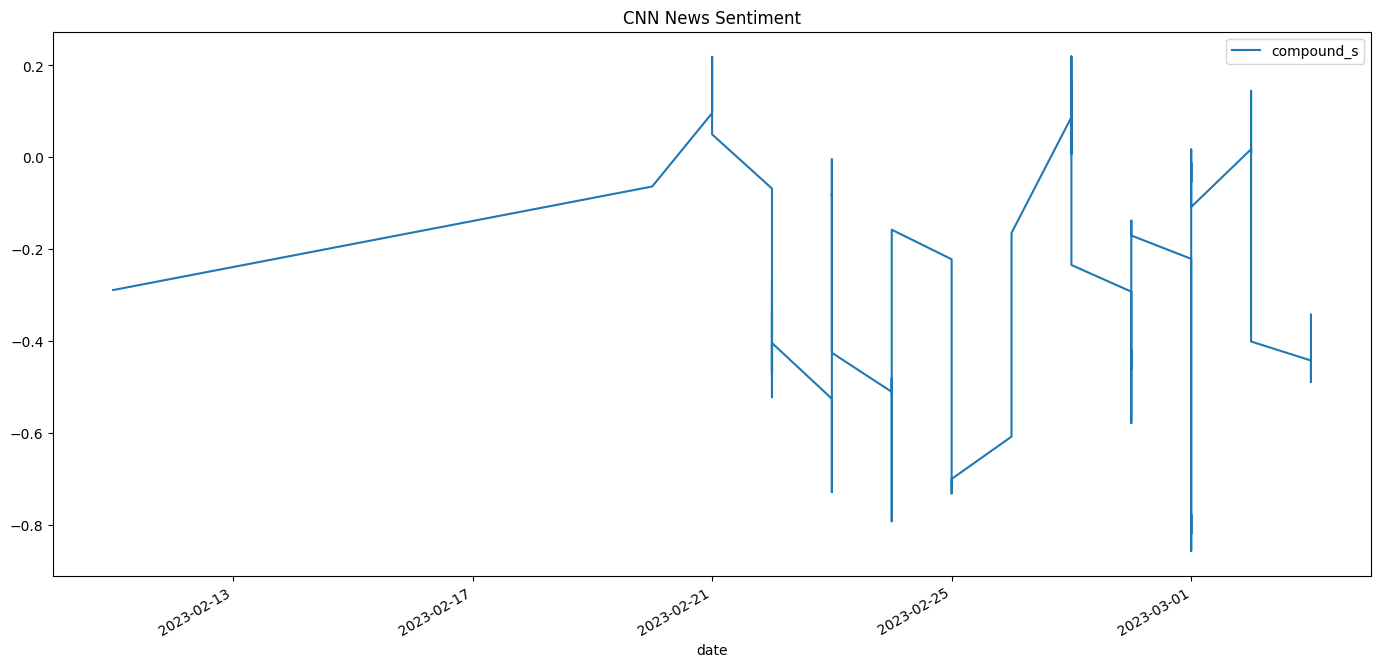

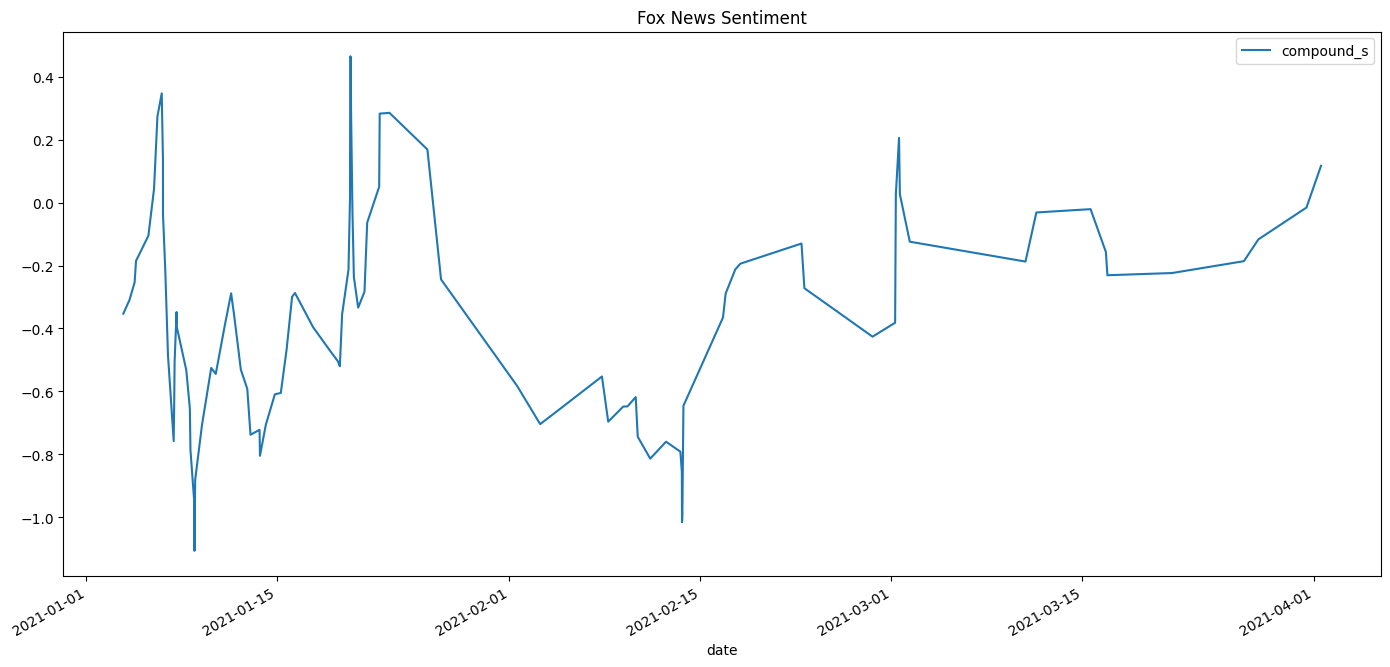

In [21]:
def plot_smooth(df:pd.DataFrame, vendor):
    df = df.sort_values(by=['date'])
    df['compound_s'] = savgol_filter(df['compound_s'], 10, 2)
    axes = df.plot(x='date', y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))

plot_smooth(cnn, 'CNN')
plot_smooth(fox, 'Fox')

In [118]:
cnn = pd.read_csv('netanyahu_cnn_news_sentiment_lbl.csv')

,title,date,pos,neg,neu,index
0,"About 160,000 people protest against Netanyahu...",2023-02-26,0,1,0,0.0
1,11 Palestinians killed during Israeli raid tar...,2023-02-22,0,0,1,1.0
2,Your flight from Israel might be about to get ...,2023-02-23,0,0,1,2.0
3,Israel launches airstrikes on Gaza after rocke...,2023-02-23,0,0,1,3.0
4,Opinion: Netanyahu's 'reforms' are threatening...,2023-02-21,0,0,1,4.0
...,...,...,...,...,...,...
95,A single sentence that perfectly captures the ...,2021-12-10,0,0,1,95.0
96,Don't count on an end to the Joe Biden-Naftali...,2021-11-08,0,1,0,96.0
97,"Israel doubles down against US, saying there i...",2021-11-07,0,1,0,97.0
98,Trump's inner circle takes a trip down memory ...,2021-10-12,0,0,1,98.0


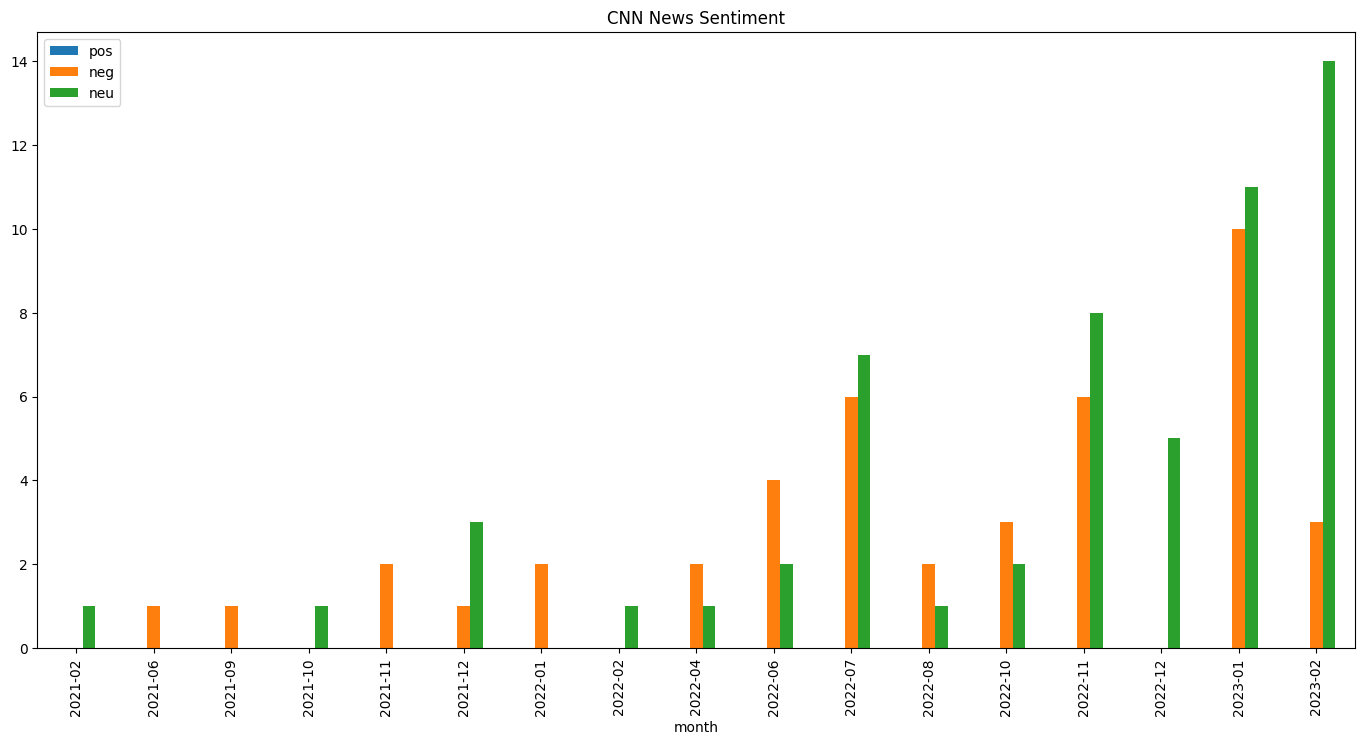

In [127]:
def add_month(row):
    row['month'] = row['date'].split('-')[0] + '-' + row['date'].split('-')[1]
    return row

# cnn = cnn.apply(add_month, axis=1)

def plot_counts(df:pd.DataFrame, vendor):

    df = df.apply(add_month, axis=1)
    df = df.sort_values(by=['month'])
    df.groupby('month').agg({'pos':'sum', 'neg':'sum', 'neu':'sum'}).plot(kind='bar', title=f'{vendor} News Sentiment', figsize=(17,8))

plot_counts(cnn, 'CNN')
# cnn

In [71]:
fox[cnn.month == '2021-12']

,Negative,Neutral,Positive,compound,compound_s,date,index,label,neg,neg_s,neu,neu_s,pos,pos_s,title,month
92,0.0,1,0.0,0,0.298789,2022-12-06 18:11:00,92.0,Neutral,0,0.162738,0,0.481707,0,0.355554,Larry Kudlow: Former Israel Prime Minister Ben...,2022-12
93,0.0,1,0.0,0,0.482590,2022-12-21 20:34:00,93.0,Neutral,0,0.117818,0,0.497002,0,0.385180,Incoming Israeli Prime Minister Netanyahu says...,2022-12
94,0.0,1,0.0,0,0.080647,2022-11-30 12:00:00,94.0,Neutral,0,0.179170,0,0.634679,0,0.186151,Netanyahu: Iran nuclear deal is 'probably dead...,2022-11
95,0.0,1,0.0,0,-0.129687,2022-12-04 15:14:00,95.0,Neutral,0,0.299839,0,0.526410,0,0.173750,Netanyahu insists he won't step on 'landmine' ...,2022-12
